### Section 4 - Support Vector Machines

Support Vector Machines try to find the best line or decision boundary that can separate out the different classes. Unlike a simple regression line that tries to minimize the distance of the line to all the points, SVM creates a line that has the highest Maximum Margin between the two closest points(support vectors) from a different class. 

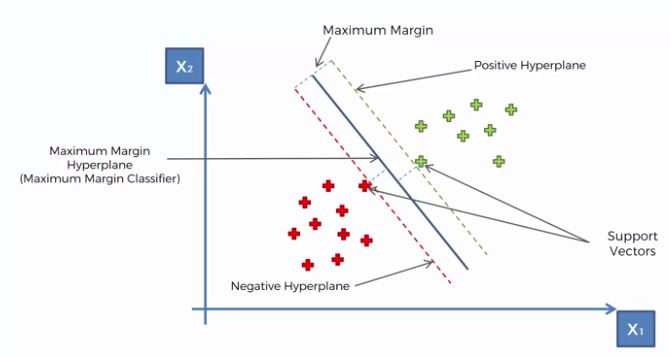

In [1]:
from IPython.display import Image
Image(filename='./images/06.jpg', width=500)

The strength of SVM's lies in the fact they take the most extremes and compare the two instead of using the most common "traits." For example, it would take a yellow apple and reddish orange and see how they are different. It looks at the very extreme cases and uses that to construct analysis. 

In [2]:
import numpy as np   #Mathematics library
import matplotlib.pyplot as plt # for plotting
import pandas as pd  #manage datasets
import seaborn as sea
import scipy.stats as stats
import sklearn

In [3]:
df = pd.read_csv('ImputeMissing.csv')
df=df.drop('Unnamed: 0',axis=1)

In [4]:
###Convert 15 Categorical to Dummies
df=pd.get_dummies(df,columns=['Auction','Make','Model','Trim','Color','Transmission','WheelType','Nationality','Size','TopThreeAmericanName','PRIMEUNIT','AUCGUART','VNZIP1','VNST','IsOnlineSale'],drop_first=True)


In [5]:
# Importing the dataset
dataset = df
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### DIMENSIONALITY REDUCTION - FEATURE EXTRACTION

In [8]:
# Applying PCA
"""
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance
"""

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components = 10)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nexplained_variance = pca.explained_variance_ratio_\nexplained_variance\n'

In [9]:
# Applying LDA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


C:\Users\volak\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [10]:
# Applying Kernel PCA
"""
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
"""

"\nfrom sklearn.decomposition import KernelPCA\nkpca = KernelPCA(n_components = 10, kernel = 'rbf')\nX_train = kpca.fit_transform(X_train)\nX_test = kpca.transform(X_test)\n"

### Training the Support Vector Machine

In [11]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Testing Model Accuracy

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15743,   267],
       [ 1633,   603]])

In [14]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89586758741642003

In [15]:
# Precision 
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.69310344827586212

In [16]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.26967799642218249

In [17]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.38828074694140374

In [18]:
# Cohen's kappa
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)


0.34318952595378416

In [19]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()


0.89694357012579984

In [20]:
accuracies.std()

0.0020689887813156887

### Training the Kernel Support Vector Machine
The Kernel SVM is a Support Vector Machine that uses a non linear kernel. 

In [21]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Testing Model Accuracy

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15819,   191],
       [ 1674,   562]])

In [24]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89778581606927543

In [25]:
# Precision 
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.74634794156706508

In [26]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.25134168157423969

In [27]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.37604550016728

In [28]:
# Cohen's kappa
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)


0.33498395286383142

In [29]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()


0.89858779616359608

In [30]:
accuracies.std()

0.002081826883037628